In [45]:
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt


def plot_network(
    G,
    node_size=1000,
    node_color="skyblue",
    edge_color="gray",
    font_size=10,
    title="Network Graph",
    figsize=(12, 8),
    with_labels=True,
    layout="spring",
    palette="husl",
):
    """
    Plot a network graph with seaborn-style aesthetics.

    Parameters:
    -----------
    G : networkx.Graph
        The network graph to visualize
    node_size : int or list
        Size of nodes (can be a single value or list for different sizes)
    node_color : str or list
        Color of nodes (can be a single value or list for different colors)
    edge_color : str
        Color of edges
    font_size : int
        Size of node labels
    title : str
        Title of the plot
    figsize : tuple
        Figure size (width, height)
    with_labels : bool
        Whether to show node labels
    layout : str
        Type of layout ('spring', 'circular', 'random', 'shell')
    palette : str
        Seaborn color palette to use if node_color is not specified

    Returns:
    --------
    fig, ax : tuple
        Matplotlib figure and axis objects
    """
    # Set the style
    sns.set_style("whitegrid")

    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # Choose layout
    layouts = {
        "spring": nx.spring_layout,
        "circular": nx.circular_layout,
        "random": nx.random_layout,
        "shell": nx.shell_layout,
    }
    pos = layouts.get(layout, nx.spring_layout)(G)

    # If node_color is not specified, use seaborn palette
    if isinstance(node_color, str) and node_color == "skyblue":
        colors = sns.color_palette(palette, n_colors=len(G.nodes()))
    else:
        colors = node_color

    # Draw the network
    nx.draw(
        G,
        pos,
        node_color=colors,
        node_size=node_size,
        edge_color=edge_color,
        with_labels=with_labels,
        font_size=font_size,
        font_weight="bold",
        ax=ax,
    )

    # Add title
    plt.title(title, fontsize=font_size + 4, pad=20)

    return fig, ax


In [46]:
# NOTE: USING langchain_experimental.graph_transformers main.
from dotenv import load_dotenv
import logging

logging.basicConfig(
    format="[%(asctime)s] p%(process)s {%(filename)s:%(lineno)d} %(levelname)s - %(message)s",
    level=logging.INFO,
)
logger = logging.getLogger(__name__)

load_dotenv()

import getpass
import os

if not os.environ.get("OPENAI_API_KEY"):
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")



In [47]:
from langchain.chat_models import init_chat_model

llm = init_chat_model("gpt-4o-mini", model_provider="openai")


from typing_extensions import Annotated, TypedDict


# TypedDict
class Json(TypedDict):
    """Json to return."""

    setup: Annotated[dict, ..., "The setup of the dict"]
    depth: Annotated[int, ..., "How many layers deep the dict is."]


from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.documents import Document

text = """
Marie Curie, born in 1867, was a Polish and naturalised-French physicist and chemist who conducted pioneering research on radioactivity.
She was the first woman to win a Nobel Prize, the first person to win a Nobel Prize twice, and the only person to win a Nobel Prize in two scientific fields.
Her husband, Pierre Curie, was a co-winner of her first Nobel Prize, making them the first-ever married couple to win the Nobel Prize and launching the Curie family legacy of five Nobel Prizes.
She was, in 1906, the first woman to become a professor at the University of Paris.
"""

from langchain_experimental.graph_transformers import LLMGraphTransformer

llm_transformer = LLMGraphTransformer(llm=llm)
documents = [Document(page_content=text)]
logger.info(f"documents:{documents}")
graph_documents = llm_transformer.convert_to_graph_documents(documents)
for i, doc in enumerate(graph_documents):
    logger.info(f"document #{i+1}")
    nodes = doc.nodes
    relationships = doc.relationships
    for n in nodes:
        logger.info(f"Nodes:{n}")
    for r in relationships:
        logger.info(f"Relationships:{r}")



[2025-02-25 15:45:13,493] p1824 {4265423800.py:31} INFO - documents:[Document(metadata={}, page_content='\nMarie Curie, born in 1867, was a Polish and naturalised-French physicist and chemist who conducted pioneering research on radioactivity.\nShe was the first woman to win a Nobel Prize, the first person to win a Nobel Prize twice, and the only person to win a Nobel Prize in two scientific fields.\nHer husband, Pierre Curie, was a co-winner of her first Nobel Prize, making them the first-ever married couple to win the Nobel Prize and launching the Curie family legacy of five Nobel Prizes.\nShe was, in 1906, the first woman to become a professor at the University of Paris.\n')]
[2025-02-25 15:45:16,737] p1824 {_client.py:1025} INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
[2025-02-25 15:45:16,756] p1824 {4265423800.py:34} INFO - document #1
[2025-02-25 15:45:16,756] p1824 {4265423800.py:38} INFO - Nodes:id='Marie Curie' type='Person' properties

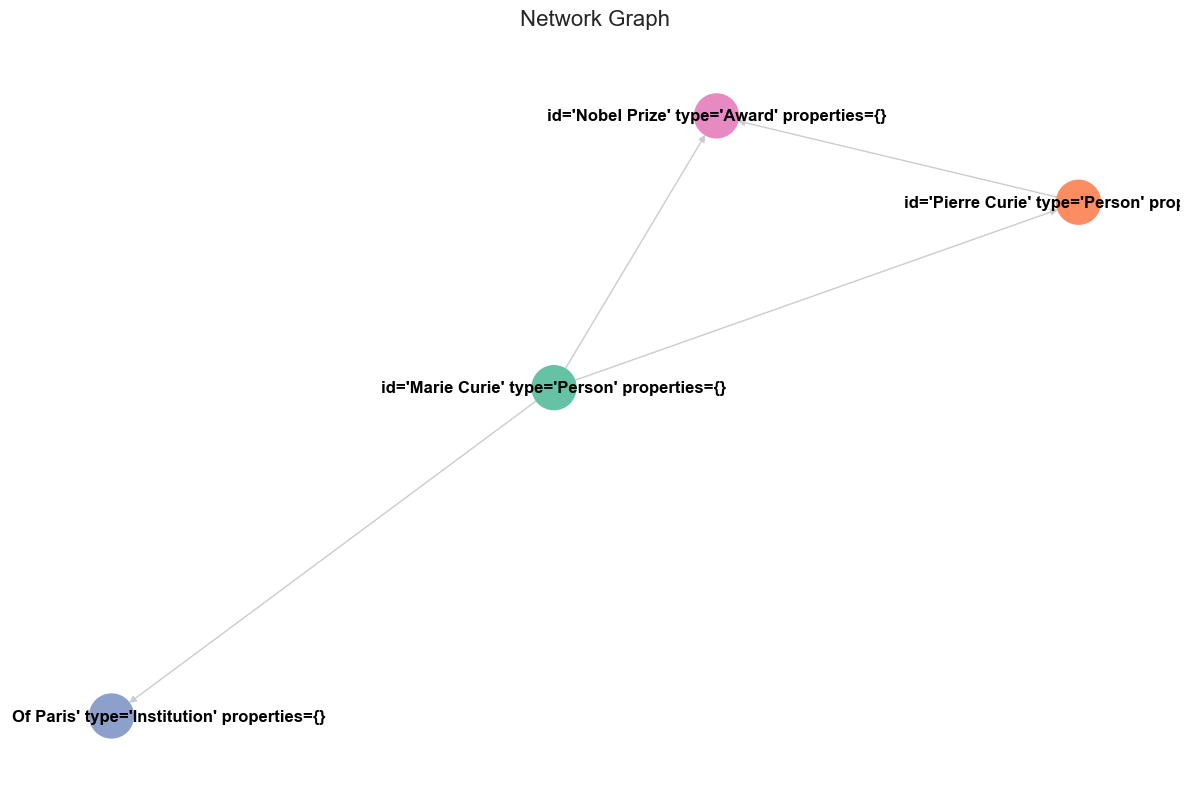

In [48]:
# from plot_graph import plot_network
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

nodes = [str(node) for node in graph_documents[0].nodes]
relationships = [
    (str(rel.source), str(rel.target)) for rel in graph_documents[0].relationships
]

G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(relationships)

custom_colors = sns.color_palette("Set2", n_colors=len(G.nodes()))
node_sizes = [3000 if d > 5 else 1000 for v, d in G.degree()]

fig, ax = plot_network(
    G,
    node_size=node_sizes,
    node_color=custom_colors,
    edge_color="#cccccc",
    font_size=12,
    layout="spring",
    palette="Set2",
)

plt.tight_layout()
plt.show()



In [49]:
nodes

["id='Marie Curie' type='Person' properties={}",
 "id='Pierre Curie' type='Person' properties={}",
 "id='University Of Paris' type='Institution' properties={}",
 "id='Nobel Prize' type='Award' properties={}"]

In [50]:
relationships

[("id='Marie Curie' type='Person' properties={}",
  "id='Nobel Prize' type='Award' properties={}"),
 ("id='Marie Curie' type='Person' properties={}",
  "id='Nobel Prize' type='Award' properties={}"),
 ("id='Marie Curie' type='Person' properties={}",
  "id='University Of Paris' type='Institution' properties={}"),
 ("id='Marie Curie' type='Person' properties={}",
  "id='Pierre Curie' type='Person' properties={}"),
 ("id='Pierre Curie' type='Person' properties={}",
  "id='Nobel Prize' type='Award' properties={}"),
 ("id='Marie Curie' type='Person' properties={}",
  "id='Nobel Prize' type='Award' properties={}"),
 ("id='Marie Curie' type='Person' properties={}",
  "id='Nobel Prize' type='Award' properties={}")]

In [51]:
# NOTE: Using classic llm.with_structured_output(json) approach

messages = [
    SystemMessage(
        "Return a json that describes the logic flow of the given codebase. Only track call stacks. Output in Cypher compliant format for graph representation."
    ),
    HumanMessage(
        """
            def greet(name):
                return f"Hello, {name}!"

            def add(a, b):
                return a + b

            def main():
                name = input("Enter your name: ")
                print(greet(name))

                try:
                    x = float(input("Enter first number: "))
                    y = float(input("Enter second number: "))
                    print(f"The sum is: {add(x, y)}")
                except ValueError:
                    print("Invalid input. Please enter numbers.")

            if __name__ == "__main__":
                main()
            """
    ),
]



[2025-02-25 14:29:10,186] p1824 {_client.py:1025} INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [41]:
messages = [
    SystemMessage(
        # "Return a json that describes the logic flow of the given codebase. Only track call stacks. Output in Cypher compliant format for graph representation."
        """
        Return a list of json with all the functions as nodes. 
        Return description on logic flow of funcitons and how other functions are used within the given function
        {
        node: name of function,
        parameters : list of all parameters used in the function,
        realtionship: list relationships between functions for all nodes such as 'add to main' or 'greet to main'
        }
        """
    ),
    HumanMessage(
        """
            def greet(name):
                return f"Hello, {name}!"

            def add(a, b):
                return a + b

            def main():
                name = input("Enter your name: ")
                print(greet(name))

                try:
                    x = float(input("Enter first number: "))
                    y = float(input("Enter second number: "))
                    print(f"The sum is: {add(x, y)}")
                except ValueError:
                    print("Invalid input. Please enter numbers.")

            if __name__ == "__main__":
                main()
            """
    ),
]

structured_llm = llm.with_structured_output(Json)
response = structured_llm.invoke(messages)
print(response)

[2025-02-25 15:12:15,792] p1824 {_client.py:1025} INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


{'setup': {'greet': {'node': 'greet', 'parameters': ['name'], 'relationship': ['greet to main']}, 'add': {'node': 'add', 'parameters': ['a', 'b'], 'relationship': ['add to main']}, 'main': {'node': 'main', 'parameters': [], 'relationship': ['main to __main__']}}, 'depth': 1}


In [44]:
response['setup']

{'greet': {'node': 'greet',
  'parameters': ['name'],
  'relationship': ['greet to main']},
 'add': {'node': 'add',
  'parameters': ['a', 'b'],
  'relationship': ['add to main']},
 'main': {'node': 'main',
  'parameters': [],
  'relationship': ['main to __main__']}}